In [122]:
import pandas as pd
import ewtpy
import pywt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers

In [145]:
df = pd.read_csv('data.csv')
print(df.to_string())
data = df.to_numpy()
temp = df['temp'].to_numpy()
humidity = df['humidity'].to_numpy()
windspeed = df['windspeed'].to_numpy()
solar_radiation = df['solarradiation'].to_numpy()
precipitation = df['precip'].to_numpy()
training_set = np.array([temp, windspeed, solar_radiation, precipitation, humidity])
NUM = 12


     temp  feelslike   dew  humidity  precip  precipprob  snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  uvindex  severerisk
0    24.0       24.0  23.0     94.15   0.000           0     0          0      29.9       12.1    120.0            1011.5       100.0         6.0               0          0.0        0          10
1    24.3       24.3  22.9     91.70   0.000           0     0          0      26.3        3.5    111.0            1011.2        96.3         8.3               0          0.0        0          10
2    24.0       24.0  23.0     94.15   0.000           0     0          0      23.4       10.3     90.0            1011.0        89.0         5.5               0          0.0        0          10
3    24.0       24.0  23.0     94.15   0.000           0     0          0      19.8        8.5     85.0            1011.0        89.0         5.5               0          0.0        0          10
4    24.0       24.0

In [146]:

training_set_tp = training_set.transpose()

In [147]:
X = training_set_tp
y = np.array([humidity]).transpose()
print(X.shape)
print(y.shape)


(768, 5)
(768, 1)


In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
y_train_1 = np.array([y_train[i + NUM] for i in range(len(y_train) - NUM)])
y_test_1 = np.array([y_test[i + NUM] for i in range(len(y_test) - NUM)])

In [149]:
model = Sequential(
    [
        tf.keras.Input(shape=(5,)),
        tf.keras.layers.Dense(units = 25, activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units = 15, activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units = 5, activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(0.001)),
        tf.keras.layers.Dense(units = 1, activation = "linear")
        ### END CODE HERE ### 
    ], name = "mlpnn_model" 
) 
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
)

model.fit(
    X_train[:-NUM],y_train_1,
    epochs=500,   
) 

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3454.5508
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2688.5420 
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2149.3738 
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1451.7085 
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 854.3698  
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 400.2732 
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 219.6601 
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 204.8276 
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 194.6821 
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 197.4417 
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 197.1056 
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.4704 
Epoch 13/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198.0535 
Epoch 14/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204.8167 
Epoch 15/500
19/19 ━━━━━━

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(5,)),
        tf.keras.layers.Dense(units = 1000, activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(0.001),kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        tf.keras.layers.Dense(units = 1, activation = "linear")
        ### END CODE HERE ### 
    ], name = "elm_model" 
) 
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
)

model.fit(
    X_train[:-NUM],y_train_1,
    epochs=500,   
) 

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4294.2793   
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1917.1127 
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 390.3127 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 304.3683 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260.0800 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 217.0348 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236.7029 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.1307 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 219.1226 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.5091 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205.1303 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222.1542 
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 200.9396 
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 205.3261 
Epoch 15/500
20/20 ━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
predict: 71.31099700927734, test: 73.46
predict: 71.3239974975586, test: 68.24
predict: 68.56382751464844, test: 80.49
predict: 78.40416717529297, test: 85.59
predict: 86.67755126953125, test: 84.21
predict: 85.21746063232422, test: 82.99
predict: 84.99458312988281, test: 85.59
predict: 87.10675811767578, test: 89.81
predict: 90.97698974609375, test: 91.09
predict: 91.87335968017578, test: 88.35
predict: 89.84495544433594, test: 90.57
predict: 91.60234832763672, test: 93.97
predict: 94.51605224609375, test: 93.97
predict: 94.30674743652344, test: 93.27
predict: 93.20305633544922, test: 93.97
predict: 93.6603775024414, test: 93.97
predict: 94.24846649169922, test: 91.74
predict: 92.32954406738281, test: 93.97
predict: 89.7329330444336, test: 91.11
predict: 85.60546875, test: 87.12
predict: 83.04049682617188, test: 80.68
predict: 77.71784973144531, test: 69.16
predict: 69.02518463134766, test: 67.02
predict: 67

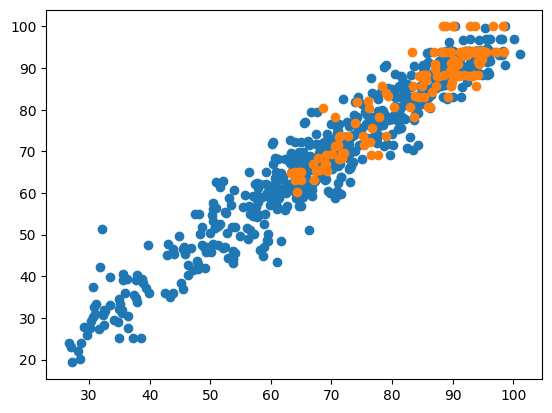

In [143]:
y_predict = model.predict(X_test)
yt_predict = model.predict(X_train)
plt.scatter (yt_predict[:-NUM,0],y_train_1[:,0])
plt.scatter (y_predict[:-NUM,0],y_test_1[:,0])
for i in range(len(y_predict) - NUM):
    print(f"predict: {y_predict[i,0]}, test: {y_test_1[i, 0]}")
print(y_predict[:,0])
print(np.corrcoef(y_predict[:-NUM,0],y_test_1[:,0]))
print(mean_squared_error(y_predict[:-NUM,0], y_test_1[:,0]))
print(np.corrcoef(yt_predict[:,0],y_train[:,0]))
print(mean_squared_error(yt_predict[:,0], y_train[:,0]))